# Parametric sweep (Au nanospheres in water, 5 to 100 nm)

In [1]:
import numpy as npy
import EMfields as em
import RefractiveIndex as ri
import matplotlib.pyplot as plt
import opticalCrossSection as ocs

In [2]:
# Definição dos parâmetros de análise e importação dos parâmetros materiais

## Se a NP for uma nanoesfera, shell_material equivale ao material da esfera
shell_material = 'Au'                                    
core_material = 'Water'
medium_material = 'Water'

## Se True, é nanocasca. Se False, é nanoesfera
isShell = False

## Raio da da nanoesfera ou núcleo (nm)
a = 30

## Espessura da casca (nm)
t = 7

## Raio da nanocasca (nm)
if isShell:
    b = a + t
else:
    b = a

## Início da região de exibição no plot
lambda_min = 300                                         

## Fim da região de exibição no plot
lambda_max = 950

## Incluir correção de drude?
drude = False

In [3]:
a_min = 2.5
a_max = 52.5
a_res = 2.5

pos_532 = 118                   # Array position equivalent to 532nm
const = (1240e-9)/(2*npy.pi)    # Supporting constant for Jo

r = npy.linspace(a_min,a_max,int((a_max-a_min)/a_res+1))
Jo = npy.empty(len(r))
S2F = npy.empty(len(r))

(300.0, 950.0)

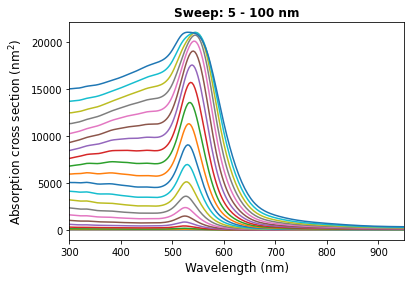

In [4]:
fig1 = plt.figure(1)
ax1 = plt.gca()

for xx in range(0,len(r),1):
    a = r[xx]
    if isShell:
        b = a + t
    else:
        b = a
    wl, N, N1, N2, mu1, mu2 = ri.setupRI(shell_material,core_material,medium_material,a,b,lambda_min,lambda_max,isShell,drude)
    
    if isShell:
        Csca, Cext, Cabs, Cbck = ocs.shellCS(wl*(1e9),N1,N2,N,mu1,mu2,a,b)
    else:
        Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,a)
    
    wl = npy.delete(wl,len(wl)-1)
    Cabs = npy.delete(Cabs,len(Cabs)-1)

    Vnp = 4*npy.pi*((a*(1e-9))**3)/3
    Jo[xx] = const*(Cabs[pos_532]*(1e-18)/Vnp)
    S2F[xx] = Cabs[pos_532]*(1e-18)/(a*(1e-9))
    
    plt.plot(wl*(1e9),Cabs)
    
plt.ylabel('Absorption cross section (nm$^2$)', fontsize=12)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.title('Sweep: 5 - 100 nm', fontsize=12, fontweight='bold')
plt.xlim([lambda_min,lambda_max])

In [5]:
r = npy.delete(r,len(r)-1)
Jo = npy.delete(Jo,len(Jo)-1)
S2F = npy.delete(S2F,len(S2F)-1)

C:\Users\Tulio\AppData\Local\Temp\ipykernel_28696\3338125312.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax21.plot(2*r,S2F/(1e-7),'ro-',color='r')


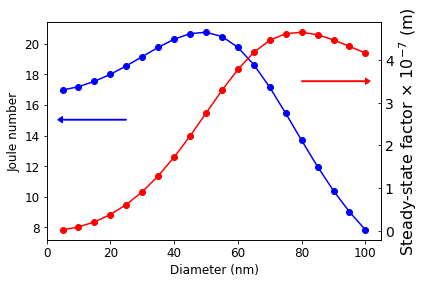

In [6]:
fig2 = plt.figure(2)
ax2 = plt.gca()
ax2.tick_params(axis='both', direction="out", which='major', labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Joule number', fontsize=12)
plt.xlabel('Diameter (nm)', fontsize=12)
#plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(2*r, Jo, 'bo-')
plt.xlim([0, 105])
ax21 = ax2.twinx()
ax21.plot(2*r,S2F/(1e-7),'ro-',color='r')
ax21.yaxis.set_tick_params(which='major', direction='in', top='on', labelcolor = 'k')
ax21.set_ylabel('Steady-state factor $\\times$ 10$^{-7}$ (m)',color="k", fontsize=16)
ax21.tick_params(axis='y', labelsize=14)
plt.arrow(80, 3.5, 20, 0, width = 0.02, color='r', head_width = 0.15, head_length = 1.5)
plt.arrow(25, 2.6, -20, 0, width = 0.02, color='b', head_width = 0.15, head_length = 1.5)
plt.show()